In [ ]:
#mount to drive
from google.colab import drive
import pandas as pd

# loading from huggingface and saving to parquet

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

# Load the XSum dataset
dataset = load_dataset("xsum")

# Split dataset
train_data = dataset['train']
val_data = dataset['validation']
test_data = dataset['test']

# Example
print("Sample Article:", train_data[0]['document'])
print("Sample Summary:", train_data[0]['summary'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

xsum.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


(…)SUM-EMNLP18-Summary-Data-Original.tar.gz:   0%|          | 0.00/255M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [ ]:
print(type(train_data))
print(train_data.shape)

saving the train test and validation data to a parquet file in drive, so that next time I can load from drive instead of downloading it again.

In [ ]:
# save train_data to a parquet file and read it from that location.
train_data.to_parquet('/content/drive/MyDrive/train_data.parquet')
val_data.to_parquet('/content/drive/MyDrive/val_data.parquet')
test_data.to_parquet('/content/drive/MyDrive/test_data.parquet')
#train_data = pd.read_parquet('/content/drive/MyDrive/train_data.parquet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating parquet from Arrow format:   0%|          | 0/205 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

26756141

# Load from parquet file from drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load parquet files from drive
train_data = pd.read_parquet('/content/drive/MyDrive/train_data.parquet')
val_data = pd.read_parquet('/content/drive/MyDrive/val_data.parquet')
test_data = pd.read_parquet('/content/drive/MyDrive/test_data.parquet')

In [ ]:
from datasets import Dataset

# Convert Pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
test_dataset = Dataset.from_pandas(test_data)

# EDA

In [ ]:
# Overview of the dataset
print(train_data.head())         # First few rows
print(train_data.info())         # Column info
print(train_data.describe())     # Statistical summary (if numerical columns exist)


                                            document  \
0  The full cost of damage in Newton Stewart, one...   
1  A fire alarm went off at the Holiday Inn in Ho...   
2  Ferrari appeared in a position to challenge un...   
3  John Edward Bates, formerly of Spalding, Linco...   
4  Patients and staff were evacuated from Cerahpa...   

                                             summary        id  
0  Clean-up operations are continuing across the ...  35232142  
1  Two tourist buses have been destroyed by fire ...  40143035  
2  Lewis Hamilton stormed to pole position at the...  35951548  
3  A former Lincolnshire Police officer carried o...  36266422  
4  An armed man who locked himself into a room at...  38826984  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204045 entries, 0 to 204044
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  204045 non-null  object
 1   summary   204045 non-null  object
 2   id

In [ ]:
print("Sample Article:\n", train_data.iloc[0]['document'])
print("Sample Summary:\n", train_data.iloc[0]['summary'])

# Check for missing values
print(train_data.isnull().sum())


Sample Article:
 The full cost of damage in Newton Stewart, one of the areas worst affected, is still being assessed.
Repair work is ongoing in Hawick and many roads in Peeblesshire remain badly affected by standing water.
Trains on the west coast mainline face disruption due to damage at the Lamington Viaduct.
Many businesses and householders were affected by flooding in Newton Stewart after the River Cree overflowed into the town.
First Minister Nicola Sturgeon visited the area to inspect the damage.
The waters breached a retaining wall, flooding many commercial properties on Victoria Street - the main shopping thoroughfare.
Jeanette Tate, who owns the Cinnamon Cafe which was badly affected, said she could not fault the multi-agency response once the flood hit.
However, she said more preventative work could have been carried out to ensure the retaining wall did not fail.
"It is difficult but I do think there is so much publicity for Dumfries and the Nith - and I totally appreciate th

## Text Analysis

In [ ]:
# Add text length columns
train_data['document_length'] = train_data['document'].apply(len)
train_data['summary_length'] = train_data['summary'].apply(len)

# Summary statistics for lengths
print(train_data[['document_length', 'summary_length']].describe())

       document_length  summary_length
count    204045.000000   204045.000000
mean       2202.116053      125.463050
std        1795.620910       30.241458
min           0.000000        1.000000
25%        1040.000000      106.000000
50%        1742.000000      126.000000
75%        2898.000000      144.000000
max      174045.000000      399.000000


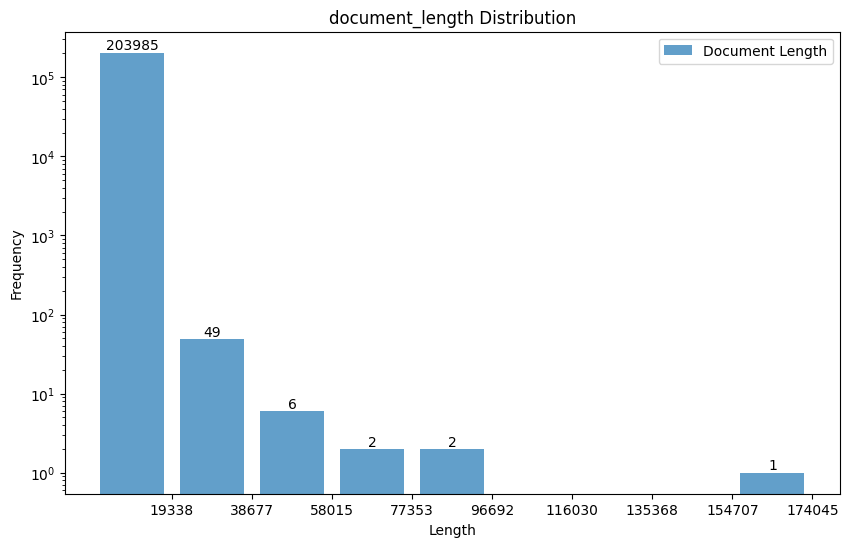

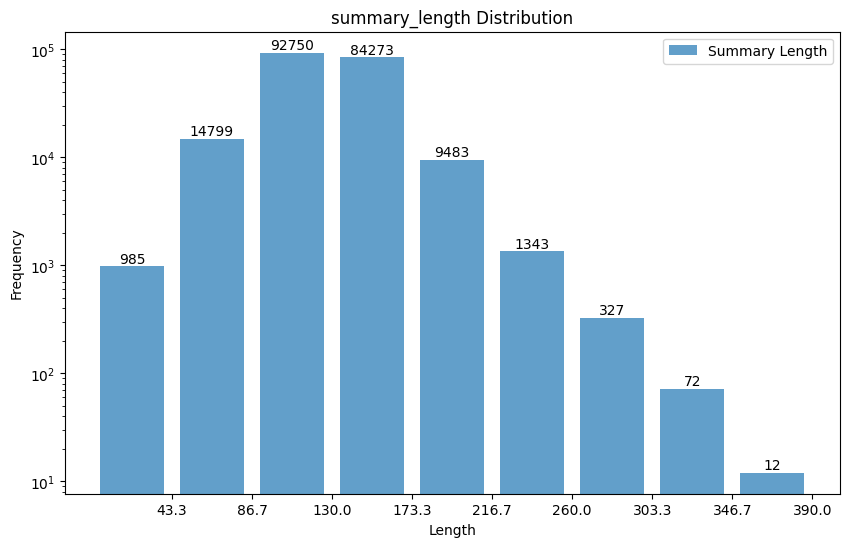

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create bins explicitly
document_length_bins = np.linspace(0, 174045, 10)  # Create 10 bins evenly spaced from 0 to max length

summary_length_bins = np.linspace(0, 390, 10)  # Create 10 bins evenly spaced from 0 to max length


def plot_histogram(data, title, label, xlabel, ylabel, bins):
  plt.figure(figsize=(10, 6))


  counts, bin_edges, _ = plt.hist(data, bins=bins, alpha=0.7, rwidth= .8, log=True, label=label)

  # Set x-axis ticks to the bin edges
  plt.xticks(bin_edges[1:])  # Use the ending values of bins for labels


  # Add counts on top of each bin
  for count, left_edge, right_edge in zip(counts, bin_edges[:-1], bin_edges[1:]):
      # Calculate the center of each bin for placing the text
      bin_center = (left_edge + right_edge) / 2
      if count > 0:  # Only annotate bins with non-zero counts
        plt.text(bin_center, count, str(int(count)), ha='center', va='bottom', rotation='horizontal')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()


plot_histogram(train_data['document_length'], 'document_length Distribution','Document Length', 'Length', 'Frequency', document_length_bins)
plot_histogram(train_data['summary_length'], 'summary_length Distribution','Summary Length', 'Length', 'Frequency', summary_length_bins)

# plt.hist(train_data['summary_length'], bins=summary_length_bins, alpha=0.7, rwidth= .8, log=True, label='Summary Length')
# plt.legend()
# plt.title('summary_length Distribution')
# plt.xlabel('Length')
# plt.ylabel('Frequency')
# plt.show()



In [ ]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
# Tokenize all text and find the most common words
all_words = [word for text in train_data['document'] for word in word_tokenize(text.lower())]
most_common_words = Counter(all_words).most_common(20)

print("Most Common Words:", most_common_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Most Common Words: [('the', 4743678), ('.', 3665232), (',', 3352460), ('to', 2097468), ('of', 1796086), ('and', 1772944), ('a', 1740210), ('in', 1688656), ('``', 1143349), ("''", 944286), ("'s", 751243), ('is', 729343), ('on', 727383), ('for', 724939), ('was', 716120), ('that', 706645), ('it', 700157), ('said', 598416), ('he', 576997), ('with', 493660)]


correlation

In [ ]:
# Correlation between document and summary lengths
correlation = train_data['document_length'].corr(train_data['summary_length'])
print(f"Correlation between document and summary length: {correlation:.2f}")

Correlation between document and summary length: 0.20


In [ ]:
train_data.drop(columns=['document_length', 'summary_length'], inplace=True)

# training using pre-trained model

Model Selection
Use a pre-trained model like BART or T5.

**Bart model**

BART (Bidirectional and Auto-Regressive Transformer) is a sequence-to-sequence model introduced by Facebook AI. It is specifically designed for tasks like:


*   Abstractive Summarization
*   Machine Translation
*   Question Answering
*   Text Generation

Key Features:

Encoder-Decoder Architecture:

* Encoder: Processes the input sequence (e.g., a document).

* Decoder: Generates the output sequence (e.g., a summary or translation).

Pretraining:

BART is pretrained using a denoising autoencoder objective:

* Input text is corrupted (e.g., tokens are masked, reordered, or deleted).
* The model learns to reconstruct the original text.

**BART Tokenizer**

The BartTokenizer is responsible for preparing the text data for the BART model. Splits the input text into tokens using subword tokenization (BPE - Byte Pair Encoding).

tokenizer("Hello world!")

{'input_ids': [0, 31414, 232, 328, 2], 'attention_mask': [1, 1, 1, 1, 1]}

input_ids: Numerical representation of tokens. Each token (word, subword, or punctuation) is mapped to an ID from the pre-trained BART vocabulary.

0: \<s> (start-of-sequence token).

31414: ID for "Hello".

232: ID for "world".

328: ID for "!".

2: \</s> (end-of-sequence token).

attention_mask: Indicates real tokens (1) vs. padding (0).

1: The token is a real part of the input.

0: The token is padding.








Key Differences Between Tokenizers and Models

Tokenizer:

Prepares the text for the model by converting it into token IDs.
Adds special tokens like <s> and </s>.
Handles padding and truncation.

Model:
Processes the tokenized input and learns to generate the appropriate output.
Uses embeddings, attention mechanisms, and other neural layers internally.

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Load BART model and tokenizer
model_name = "facebook/bart-large-xsum"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

# Preprocessing
Tokenize the data and prepare it for the model.

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


How Is This Numerical Data Used by the Model?

input_ids:
Passed to the model as the input sequence.
The model uses these IDs to look up embeddings (numerical vector representations) for each token.

attention_mask:
Ensures the model focuses only on real tokens and ignores padding during computations.

labels:
Used as the ground truth for computing the loss during training.
The model generates predictions for the input (input_ids), and these predictions are compared against labels to calculate the error.

Explanation of changes

Change the input argument of the preprocess_data function from batch to examples. When using Dataset.map with batched=True, the function receives a dictionary where keys are column names and values are lists of elements. The examples argument better represents this structure.
The tokenizer is now applied to examples['document'] and examples['summary'], which are lists of strings. This change allows the tokenizer to process the entire batch at once, rather than expecting individual strings.

Adding this because the previous one had crashed later training with inputs type `list` where type `int` is expected error.


In [ ]:
from datasets import Dataset

def preprocess_data(batch):
    inputs = tokenizer(batch['document'], max_length=1024, truncation=True, padding="max_length", return_tensors="pt")
    outputs = tokenizer(batch['summary'], max_length=128, truncation=True, padding="max_length", return_tensors="pt")
    inputs['labels'] = outputs['input_ids']
    return inputs

# Preprocess training data
# Convert pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_data_trimmed)
# Preprocess training data using Hugging Face Dataset map function
train_dataset = train_dataset.map(preprocess_data, batched=True)
# Convert Hugging Face Dataset back to pandas DataFrame
train_data_as_df = train_dataset.to_pandas()


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
print(train_dataset.column_names)
train_dataset = train_dataset.remove_columns(['document', 'summary','id'])
print(train_dataset.column_names)

['document', 'summary', 'id', 'input_ids', 'attention_mask', 'labels']
['input_ids', 'attention_mask', 'labels']


Fine-Tuning
Fine-tune the model on the XSum dataset.

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results", # Specifies the directory where model checkpoints, logs, and outputs will be saved during training. Useful for resuming training later or for deployment.
    evaluation_strategy="epoch", #Indicates when evaluation should be performed. epoch: Evaluates at the end of every training epoch. steps: Evaluates every eval_steps (e.g., every 500 steps). no: Skips evaluation
    learning_rate=5e-5, # Sets the learning rate for the optimizer. 5e-5 is a common default for fine-tuning transformer models.
    per_device_train_batch_size=2, # The batch size for training on each device (e.g., per GPU or TPU core). If using 2 GPUs, the effective batch size becomes 2 x num_gpus.
    per_device_eval_batch_size=2, # The batch size for evaluation, handled similarly to training batch size.
    num_train_epochs=3, # The number of complete passes (epochs) through the entire training dataset.
    save_steps=10_000, # Saves a checkpoint of the model every 10,000 steps. This is useful for resuming training after interruptions.
    save_total_limit=2, # Limits the number of saved checkpoints. The oldest checkpoints are deleted once the limit is reached.
    remove_unused_columns=False, # Prevents the automatic removal of dataset columns not required by the model.
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_data,
    tokenizer=tokenizer,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-fb6d2889c435>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


KeyError: 0

Evaluation
Evaluate the model using ROUGE.

In [ ]:
from datasets import load_metric

metric = load_metric("rouge")

def evaluate_summaries(model, tokenizer, data):
    summaries = []
    for sample in data:
        inputs = tokenizer(sample['document'], return_tensors="pt", truncation=True, max_length=1024)
        output = model.generate(inputs['input_ids'], max_length=128, num_beams=4, early_stopping=True)
        summaries.append(tokenizer.decode(output[0], skip_special_tokens=True))
    return summaries

# Get predictions
test_summaries = evaluate_summaries(model, tokenizer, test_data)

# Compute ROUGE
results = metric.compute(predictions=test_summaries, references=test_data['summary'])
print("ROUGE Scores:", results)


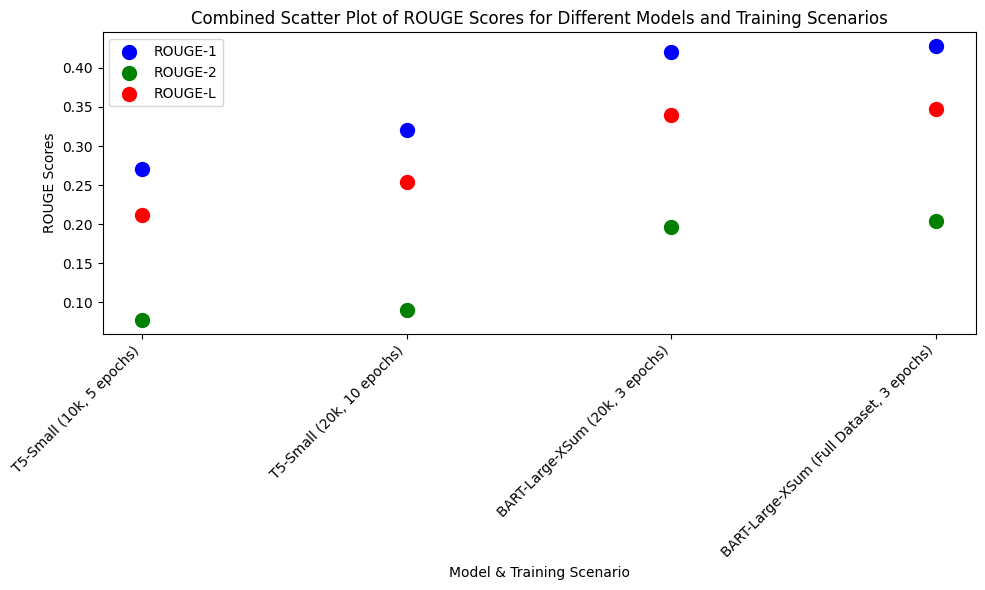

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['T5-Small (10k, 5 epochs)', 'T5-Small (20k, 10 epochs)',
          'BART-Large-XSum (20k, 3 epochs)', 'BART-Large-XSum (Full Dataset, 3 epochs)']

rouge_1 = [0.2702, 0.3200, 0.4208, 0.4281]
rouge_2 = [0.0772, 0.0895, 0.1957, 0.2042]
rouge_L = [0.2110, 0.2534, 0.3402, 0.3475]

# Set positions for the models on X-axis
x = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each ROUGE score for every model/training scenario
ax.scatter(x, rouge_1, color='blue', label='ROUGE-1', s=100)
ax.scatter(x, rouge_2, color='green', label='ROUGE-2', s=100)
ax.scatter(x, rouge_L, color='red', label='ROUGE-L', s=100)

# Labels and title
ax.set_xlabel('Model & Training Scenario')
ax.set_ylabel('ROUGE Scores')
ax.set_title('Combined Scatter Plot of ROUGE Scores for Different Models and Training Scenarios')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


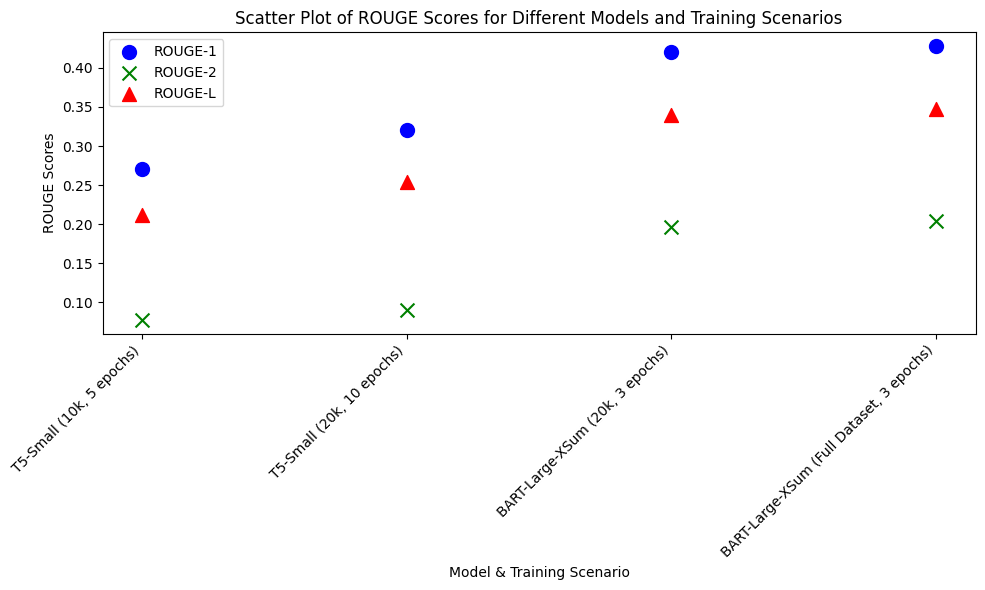

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['T5-Small (10k, 5 epochs)', 'T5-Small (20k, 10 epochs)',
          'BART-Large-XSum (20k, 3 epochs)', 'BART-Large-XSum (Full Dataset, 3 epochs)']

rouge_1 = [0.2702, 0.3200, 0.4208, 0.4281]
rouge_2 = [0.0772, 0.0895, 0.1957, 0.2042]
rouge_L = [0.2110, 0.2534, 0.3402, 0.3475]

# Set positions for the models on X-axis
x = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for each ROUGE score
ax.scatter(x, rouge_1, color='blue', label='ROUGE-1', s=100, marker='o')
ax.scatter(x, rouge_2, color='green', label='ROUGE-2', s=100, marker='x')
ax.scatter(x, rouge_L, color='red', label='ROUGE-L', s=100, marker='^')

# Labels and title
ax.set_xlabel('Model & Training Scenario')
ax.set_ylabel('ROUGE Scores')
ax.set_title('Scatter Plot of ROUGE Scores for Different Models and Training Scenarios')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


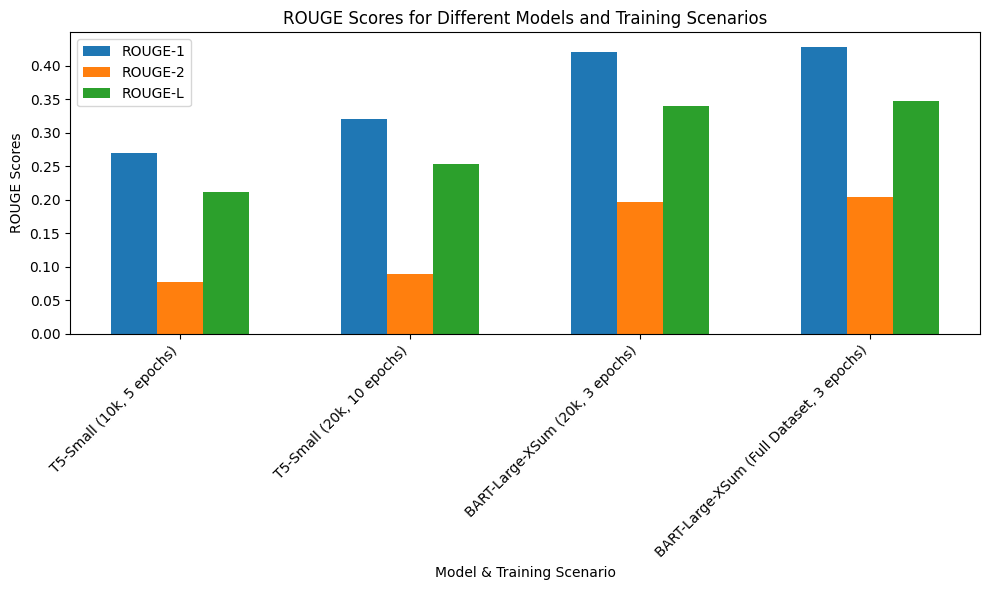

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['T5-Small (10k, 5 epochs)', 'T5-Small (20k, 10 epochs)',
          'BART-Large-XSum (20k, 3 epochs)', 'BART-Large-XSum (Full Dataset, 3 epochs)']

rouge_1 = [0.2702, 0.3200, 0.4208, 0.4281]
rouge_2 = [0.0772, 0.0895, 0.1957, 0.2042]
rouge_L = [0.2110, 0.2534, 0.3402, 0.3475]

# Set positions for the bars
x = np.arange(len(models))
width = 0.2  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width, rouge_1, width, label='ROUGE-1')
bar2 = ax.bar(x, rouge_2, width, label='ROUGE-2')
bar3 = ax.bar(x + width, rouge_L, width, label='ROUGE-L')

# Labels and title
ax.set_xlabel('Model & Training Scenario')
ax.set_ylabel('ROUGE Scores')
ax.set_title('ROUGE Scores for Different Models and Training Scenarios')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
